In [40]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.decomposition import PCA

In [45]:
schrooms = pd.read_csv('agaricus-lepiota.data')
schrooms.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [46]:
dummies = pd.get_dummies(schrooms.drop('edibility', axis='columns'))

Amount of clusters for largest k-value = 9


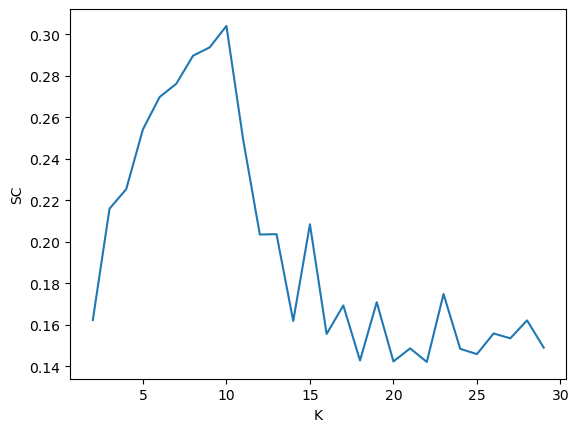

In [57]:
sc = []
k = range(2, 30)
for n in k:
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(dummies)
    sc.append(metrics.silhouette_score(dummies.values, kmeans.labels_, metric='euclidean'))
    
print("Amount of clusters for largest k-value", end = " = ")
print(sc.index(max(sc)) + 1)

plt.xlabel('K')
plt.ylabel('SC')
plt.plot(k, sc)

[10  9  8  7  6  5 11]


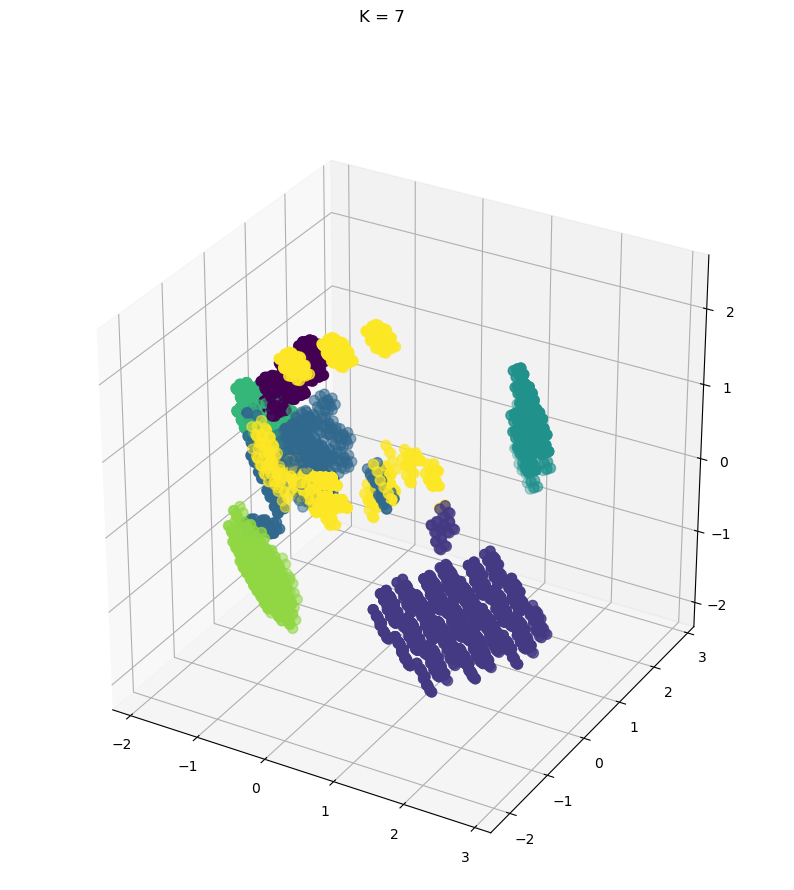

In [78]:
n = 7
sc = np.array(sc)
idx = np.argpartition(sc, -n)[-n:]
indices = idx[np.argsort((-sc)[idx])] + 2
print(indices)

k = indices[3]
labels = KMeans(n_clusters=k).fit_predict(df_pca)
pca = PCA(n_components=3)
x_plot = np.array(pca.fit_transform(dummies))
fig = plt.figure(figsize=(10,10))
fig.suptitle(f"K = {k} ")
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_plot[:,0], x_plot[:,1], x_plot[:,2], c=labels, s=50, cmap='viridis')